<a href="https://colab.research.google.com/github/rimchristian/Hotel-Reservation-ML-Model/blob/main/hotelbooking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Description**

### **Task**
The aim is to predict if the customer is going to honor the reservation or cancel it?

### **Data Dictionary:**

**Features** | **Description**  
--- | ---
booking_id | Unique  id
no_of_adults | Number of adults 
no_of_children | Number of children
no_of_weekend_nights | Number of weekend stay at night (Saturday or Sunday) the guest stayed or booked to stay at the hotel. 
no_of_weekday_nights | Number of weekdays stays at night (M-F) in the hotel
type_of_meal_plan | Type of meal booked
required_car_parking_space | How many parking areas are neccsary for the customers
room_type_reserved | code of room type reserved. Code is presented instead of designation for privacy reasons. 
lead_time | Number of days that elaposed between the entering date of the booking into the PMS and the arrival date. 
arrival_date_yar | Year of arrival date
arrival_date_month  | The months in which guests are coming 
arrival_date_week_number | Week number of year for arrival date
arrival_date_day_of_month | Which day of the months guest is arriving
market_segment_type | through which channel hotels were booked
repeated_guest | the values indicating if the booking name was from a repeated guest (1) or not (0)
no_of_previous_cancellations | show if the repeated guest has cancelled the booking before
no_of_previous_not_cancellations | Show if the repeated guest has not cancelled the booking before
avg_price_per_room | Average Price/Room that describes  the way of means of dividing the sum of all accommodations transactions using entire number of staying nights.
no_of_special_reports | total unique requests from consumers
booking_status | the last status of reservation, Canceled (1) or Not Canceled (0)


###**Import Libraries**

In [9]:
## Pandas
import pandas as pd
## Numpy
import numpy as np
## MatPlotLib
import matplotlib.pyplot as plt
# seaborn
import seaborn as sns

## Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer


## Models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Boosting Algorithm 
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

## Classification Metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, \
RocCurveDisplay,  roc_auc_score

from sklearn.model_selection import GridSearchCV

# Import SMOTE
from imblearn.over_sampling import SMOTE
# Import special pipeline for smote
from imblearn.pipeline import make_pipeline as smote_pipe

from sklearn import metrics
## Set global scikit-learn configuration 
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

### **Functions**

In [10]:
## Define a function that takes in arguments and prints out a classification report and confusion matrix
def evaluate_classification(model, X_test, y_test, cmap='Greens',
                            normalize=None, classes=None, figsize=(20,5)):
  """Takes as arguments: a model, features, and labels
  Prints a classification report, confusion matrix
  Optional arguments: 
    cmap: colormap 
    normalize: confusion matrix normalization ['true', 'pred', 'all' or None]
    classes: ordered list of class labels
    figsize: size of figure"""
  test_preds = model.predict(X_test)
  print(metrics.classification_report(y_test, test_preds, 
                                      zero_division=0,
                                      target_names=classes))
  
  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=cmap, 
                                display_labels=classes,
                                normalize=normalize)
  plt.show()

In [11]:
## Create a function to display the classification metrics of a model
def classification_metrics(model, X_test, y_test, label='Test Data', 
                             figsize=(15,5), normalize='true',
                             cmap='Greens'): 
                             
    fig, axes = plt.subplots(1,2, figsize=figsize)

    ## Get the predictions
    y_pred = model.predict(X_test)
     
   ## Print classification report for the test data (and make it pretty!)
    print('---'*20)
    print(f"[i] CLASSIFICATION REPORT FOR: {label}")
    print('---'*20)

    print(classification_report(y_test, y_pred))

    ConfusionMatrixDisplay.from_predictions(y_test,y_pred, 
                normalize=normalize, cmap=cmap,              
                ax=axes[0])    
    
    RocCurveDisplay.from_estimator(model, X_test, y_test,
                                   ax=axes[1])
    plt.show()

# **Load and Inspect the Data**

In [12]:
filename = '/content/Hotel Reservations 2.csv'
df = pd.read_csv(filename)

In [13]:
# display the first 5 rows
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [14]:
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 36275 rows, and 19 columns.
The rows represent 36275 observations, and the columns represent 18 features and 1 target variable.


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

### **Inspecting**

# **Clean the Data**

## **Remove Unnecessary Columns**

In [16]:
# drop columns
df = df.drop(columns=['Booking_ID'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

## **Remove Unnecessary Rows**

In [17]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


## **Inspect Column Names for Errors**

In [18]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

## **Inspect Values for Errors**

In [19]:
# displaying the summary statistics for the numeric columns
df.describe(include='number')

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000,26000.000000
mean,1.890000,0.141231,0.882385,2.261923,0.042115,66.452846,2017.850269,7.332923,15.750231,0.032769,0.028538,0.213115,105.695838,0.741962
std,0.528702,0.462502,0.887371,1.512341,0.200856,68.606799,0.356814,3.138925,8.849394,0.178035,0.408891,2.068243,37.876592,0.815109
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,12.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.750000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,44.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,100.000000,1.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,100.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,127.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [20]:
# displaying the summary statistics for the categorical columns
df.describe(include='object')

,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,26000,26000,26000,26000
unique,4,7,5,2
top,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,20398,18640,20019,18558


In [21]:
df_numeric = df[['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year','arrival_month','arrival_date','repeated_guest','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','avg_price_per_room','no_of_special_requests' ]]
df_categorical = df[['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']]

In [22]:
df_numeric.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0
4,2,0,1,1,0,48,2018,4,11,0,0,0,94.50,0


In [23]:
df['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [24]:
df['type_of_meal_plan'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [25]:
df['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

## **Missing Values**

In [26]:
# Display the total number of missing values 
print(f'There are {df.isna().sum().sum()} missing values.')

There are 0 missing values.


# **Visualization**

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26000 entries, 0 to 36273
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          26000 non-null  int64  
 1   no_of_children                        26000 non-null  int64  
 2   no_of_weekend_nights                  26000 non-null  int64  
 3   no_of_week_nights                     26000 non-null  int64  
 4   type_of_meal_plan                     26000 non-null  object 
 5   required_car_parking_space            26000 non-null  int64  
 6   room_type_reserved                    26000 non-null  object 
 7   lead_time                             26000 non-null  int64  
 8   arrival_year                          26000 non-null  int64  
 9   arrival_month                         26000 non-null  int64  
 10  arrival_date                          26000 non-null  int64  
 11  market_segment_

### **Bivariate Visuals**

Text(0.5, 1.0, 'Hotel Bookings for Weekday and Weeknights')

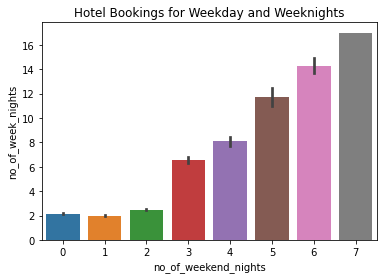

In [28]:
sns.barplot(data=df, x='no_of_weekend_nights',y='no_of_week_nights')
plt.title('Hotel Bookings for Weekday and Weeknights')

This barplot shows the amount of length  for both bookings on weeekend and weekday nights. The most amount of bookings happens on Sunday, which is obvious. 

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Class')

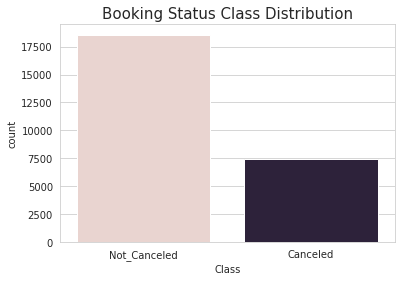

In [29]:
sns.set_style("whitegrid")
ax = sns.countplot(df['booking_status'], palette=sns.cubehelix_palette(2))
plt.title('Booking Status Class Distribution', fontsize=15)
plt.xlabel(xlabel='Class')

The two classes were not distributed balanced so the data may be imbalanced. 1 for Canceled and 0 for Not Canceled. 

In [30]:
df['booking_status'].value_counts()
df['booking_status'].replace({'Canceled':1,'Not_Canceled':0}, inplace=True)
df['booking_status'].value_counts()


0    18558
1     7442
Name: booking_status, dtype: int64

Text(0.5, 1.0, 'Number of Adults and Children')

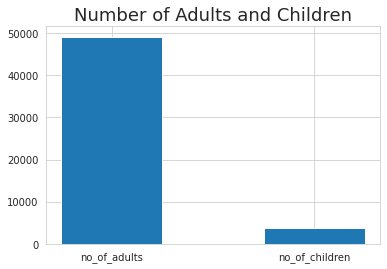

In [31]:
fig, ax = plt.subplots()
ax.bar(np.arange(2), [df['no_of_adults'].sum(), df['no_of_children'].sum()], width=0.5)
plt.xticks(np.arange(2), ('no_of_adults','no_of_children'))
plt.title('Number of Adults and Children', fontsize=18)

More adults has booked a room than children. 

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Average Prices of Each Room Types')

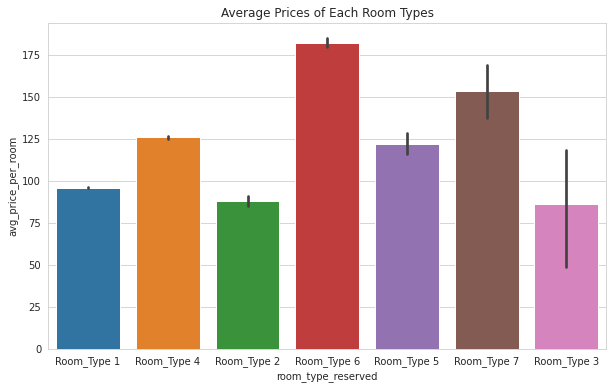

In [32]:
plt.figure(figsize=(10,6))
ax =  sns.barplot(df['room_type_reserved'], df['avg_price_per_room'])
plt.title('Average Prices of Each Room Types')

Room Type 6 is the most expensive one, followed by Room Type 7.  Room Type 2 or Type 3 is the cheapest one. 

Text(0.5, 1.0, 'Booking Distribution by the days of Months')

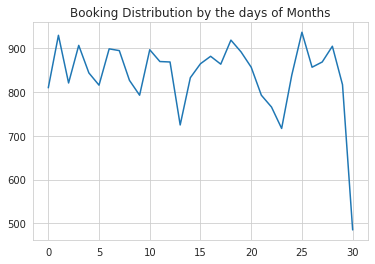

In [33]:
plt.plot(df['arrival_date'].value_counts().sort_index().values)
plt.title('Booking Distribution by the days of Months')

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Bookings by Year')

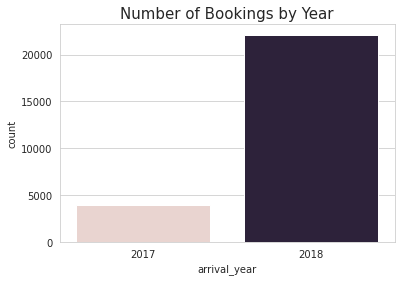

In [34]:
ax = sns.countplot(df['arrival_year'], palette=sns.cubehelix_palette(2))
plt.title('Number of Bookings by Year', fontsize=15)

- Our samples are mostly in 2018. 

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Cancelation Situation by Months')

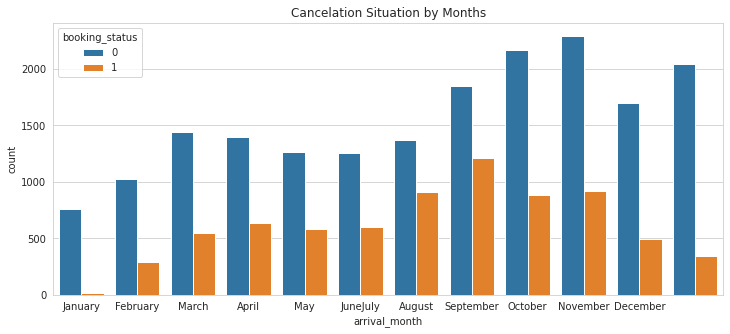

In [35]:
plt.figure(figsize=(12,5))
sns.countplot(df['arrival_month'], hue=df['booking_status'])
plt.xticks(np.arange(0,11),["January", "February", "March", "April","May","June"
"July","August","September","October","November","December"])
plt.title('Cancelation Situation by Months')

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Special Request - Cancellation')

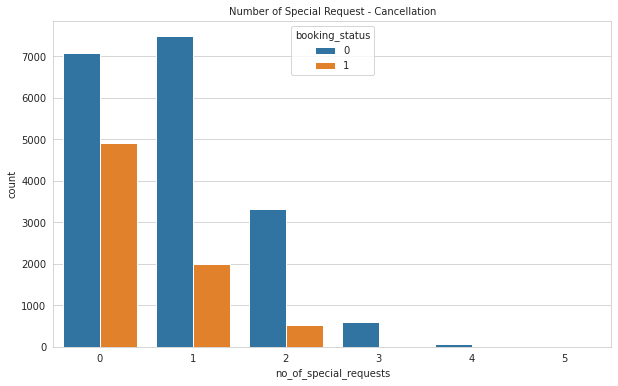

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(df['no_of_special_requests'], hue=df['booking_status'])
plt.title('Number of Special Request - Cancellation', fontsize=10)

This chart shows that the cancelation rate is higher for the guests who didn have a special request. 



In [37]:
df.groupby('repeated_guest')['booking_status'].value_counts()

repeated_guest  booking_status
0               0                 17715
                1                  7433
1               0                   843
                1                     9
Name: booking_status, dtype: int64

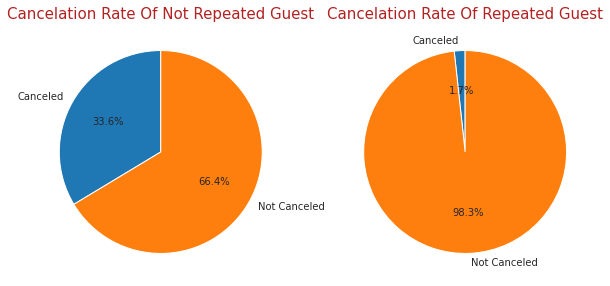

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), subplot_kw={'aspect': 'equal'})
ax[0].pie([11896,23476], labels=["Canceled","Not Canceled"], autopct='%1.1f%%', startangle=90)
ax[0].set_title("Cancelation Rate Of Not Repeated Guest",color="#b22222",fontsize=15)
ax[1].pie([16,914], labels=["Canceled","Not Canceled"], autopct='%1.1f%%', startangle=90)
ax[1].set_title("Cancelation Rate Of Repeated Guest",color="#b22222",fontsize=15);

- The cancelation rate is higher for not repeated guests compared to repeated ones. 
- Most of the repeated guests didn't cancel. A good sign.  

In [49]:
df.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                            int64
dtype: object

### **Identifying Outliers**

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Lead Time by Cancellation')

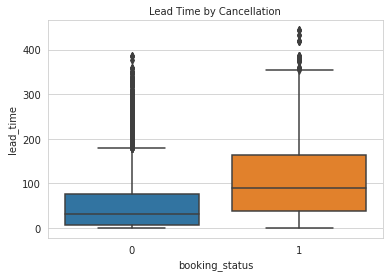

In [39]:
# deploying a boxplot for the booking status
sns.boxplot(df['booking_status'], df['lead_time'])
plt.title('Lead Time by Cancellation', fontsize=10)

**Bivariate Analysis:**

This shows an interesting insight about cancellations and the 'lead time.' As a reminder, the lead time is the elapsed time between the booking and arrival date. 
There seems to be a higher cancellation rate when the lead time is longer. 

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Lead Time by Cancellation')

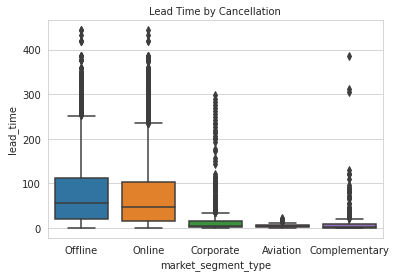

In [40]:
# deploying a boxplot
sns.boxplot(df['market_segment_type'], df['lead_time'])
plt.title('Lead Time by Cancellation', fontsize=10)

**Bivariate Analysis:**

This boxplot shows that the offline has the most lead time. Online was close too.  More people reserve in person than online. There are outliers to expand the analysis. 

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Parking Space Reservation')

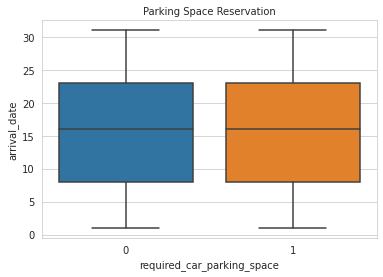

In [43]:
# deploying a boxplot on parking space and arrival date
sns.boxplot(df['required_car_parking_space'], df['arrival_date'])
plt.title('Parking Space Reservation', fontsize=10)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Repeated guests reserving on weekdays')

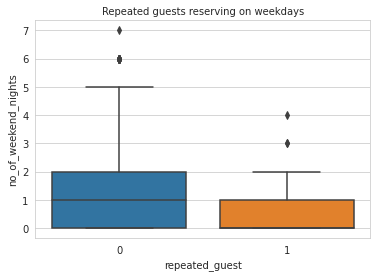

In [44]:
# deploying a boxplot on repeated guests and number of weekened nights
sns.boxplot(df['repeated_guest'], df['no_of_weekend_nights'])
plt.title('Repeated guests reserving on weekdays', fontsize=10)

## **Correlation**

<AxesSubplot:>

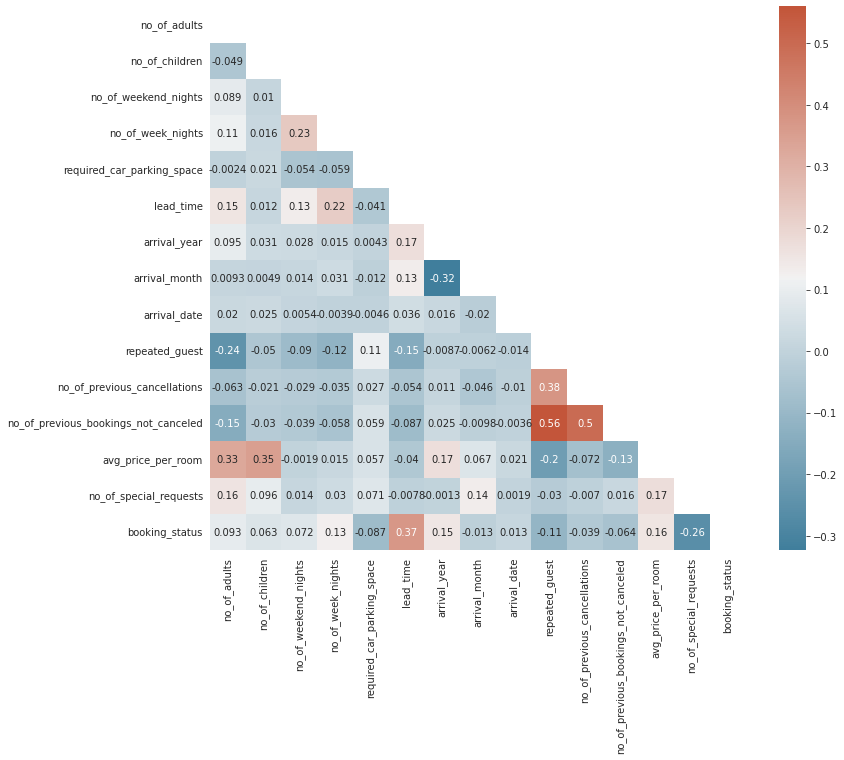

In [45]:
# set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(12,10))
mask = np.triu(np.ones_like(df.corr(), dtype='bool'))
cmap = sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(df.corr(), annot=True,mask=mask,cmap=cmap)

**Correlation Summary:**

There isn't much of a correlation between the target and the feature variables. The booking status and the lead time had a correlation of 0.44, which is pretty moderate.
The other important thing to note is that there is no correlation greater than 60%. The highest was 0.54 between repeated guests and number of previous bookings not canceled. I have a pie chart to demonstrate the cancelation chart for repeated guests.

# **Model Validation Split**

## **Creating a copy of the dataframe**

In [46]:
# create a copy of the dataset for modeling
new_df = df.copy()
new_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,0
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,0
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,1
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,1
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,1


In [47]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26000 entries, 0 to 36273
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          26000 non-null  int64  
 1   no_of_children                        26000 non-null  int64  
 2   no_of_weekend_nights                  26000 non-null  int64  
 3   no_of_week_nights                     26000 non-null  int64  
 4   type_of_meal_plan                     26000 non-null  object 
 5   required_car_parking_space            26000 non-null  int64  
 6   room_type_reserved                    26000 non-null  object 
 7   lead_time                             26000 non-null  int64  
 8   arrival_year                          26000 non-null  int64  
 9   arrival_month                         26000 non-null  int64  
 10  arrival_date                          26000 non-null  int64  
 11  market_segment_

## **Feature Engineering**

In [50]:
new_df['booking_status'].value_counts(normalize=False)

0    18558
1     7442
Name: booking_status, dtype: int64

In [51]:
new_df['booking_status'].value_counts(normalize=True)

0    0.713769
1    0.286231
Name: booking_status, dtype: float64

In [52]:
# ordinal encoding for 'type of meal plan'
new_df['type_of_meal_plan'].value_counts()
new_df['type_of_meal_plan'] = new_df['type_of_meal_plan'].replace({'Meal Plan 1':1, 'Meal Plan 2':2,'Meal Plan 3':3,'Not Selected':0})
new_df['type_of_meal_plan'].value_counts()

1    20398
0     4463
2     1134
3        5
Name: type_of_meal_plan, dtype: int64

In [53]:
# ordinal encoding for 'room_type_reserved'
new_df['room_type_reserved'].value_counts()
new_df['room_type_reserved'] = new_df['room_type_reserved'].replace({'Room_Type 1':1, 'Room_Type 2':2,'Room_Type 3':3,'Room_Type 4':4,'Room_Type 5':5,
                                                             'Room_Type 6':6,'Room_Type 7':7})
new_df['room_type_reserved'].value_counts()

1    18640
4     5423
6      943
2      600
5      232
7      156
3        6
Name: room_type_reserved, dtype: int64

In [54]:
# ordinal encoding for 'room_type_reserved'
new_df['market_segment_type'].value_counts()
new_df['market_segment_type'] = new_df['market_segment_type'].replace({'Online':1, 'Offline':2,'Corporate':3,'Complementary':4,'Aviation':5})
new_df['market_segment_type'].value_counts()

1    20019
2     4112
3     1412
4      357
5      100
Name: market_segment_type, dtype: int64

The new values and keys are:
1 -> Online
2 -> Offline
3 -> Corporate 
4 -> Complementary
5 -> Aviation

In [55]:
# displaying the average room price for each month 
avg_price_month = new_df.groupby(['arrival_month'])['avg_price_per_room'].median()
avg_price_month

arrival_month
1      77.00
2      80.30
3      85.44
4      99.45
5     116.10
6     111.69
7     108.00
8     112.00
9     117.81
10    106.10
11     88.00
12     88.00
Name: avg_price_per_room, dtype: float64

# **Preprocessing**

In [61]:
# separating the feature and target column 
target = 'booking_status'
labels = ['Not_Canceled', 'Canceled']

X = new_df.drop(columns=[target], axis=1)
y = new_df[target]

In [62]:
# split 
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [63]:
# get the shape of train and test data
print('train size X: ',X_train.shape)
print('train size y: ',y_train.shape)
print('train size X: ',X_test.shape)
print('train size y: ',y_test.shape)

train size X:  (19500, 17)
train size y:  (19500,)
train size X:  (6500, 17)
train size y:  (6500,)


In [64]:
# instantiate the column selectors
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')

In [65]:
# feature scaling and one hot encoding 
scaler = StandardScaler()
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [66]:
# create tuples
num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)

In [67]:
# create the preprocessor 
preproccessor = make_column_transformer(num_tuple,cat_tuple,remainder='drop')

# **Logistic Regression Model**

## **Default Model**

In [68]:
# making an instance of a model 
logreg = LogisticRegression(class_weight=None)

# create a pipeline
logreg_pipe = make_pipeline(scaler,logreg)

# fit the log reg model
logreg_pipe.fit(X_train,y_train)
print(logreg_pipe.score(X_train,y_train))
print(logreg_pipe.score(X_test,y_test))

0.8076923076923077
0.812923076923077


In [69]:
logreg_train_preds = logreg_pipe.predict(X_train)
logreg_test_preds = logreg_pipe.predict(X_test)

## **Metrics**

In [70]:
# creating multiple classification report
print(classification_report(y_test, logreg_test_preds))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      4643
           1       0.72      0.57      0.63      1857

    accuracy                           0.81      6500
   macro avg       0.78      0.74      0.75      6500
weighted avg       0.81      0.81      0.81      6500



We got a 0.63 f1-score on our model created using default parameters. I am going to increase my model performance and evaluate again.



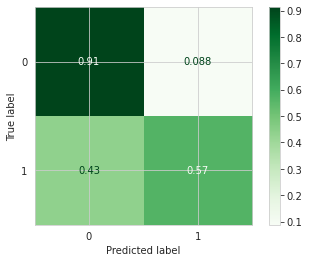

In [71]:
# create a confusion matrix with the test data
ConfusionMatrixDisplay.from_predictions(y_test, logreg_test_preds,
                                         normalize='true',cmap='Greens');

## **Balancing the Class Weight**

              precision    recall  f1-score   support

           0       0.90      0.76      0.83      4643
           1       0.57      0.79      0.66      1857

    accuracy                           0.77      6500
   macro avg       0.74      0.78      0.74      6500
weighted avg       0.81      0.77      0.78      6500



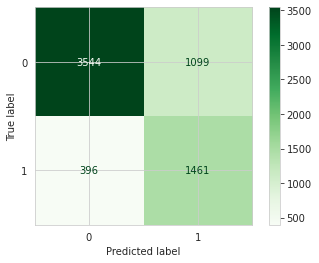

In [72]:
#Instantiate the pipeline with the scaler and weighted model
log_reg_weighted = LogisticRegression(max_iter=1000, class_weight='balanced')

# creating a pipeline
log_reg_weighted_pipe = make_pipeline(scaler, log_reg_weighted)

#Fit and evaluate the model
log_reg_weighted_pipe.fit(X_train, y_train)

# Evaluate the logistic regression pipe using function
evaluate_classification(log_reg_weighted_pipe, X_test, y_test)

{0.0001: 0.7143076923076923,
 0.001: 0.7789230769230769,
 0.01: 0.8084615384615385,
 0.1: 0.8136923076923077,
 1: 0.813076923076923,
 10: 0.813076923076923,
 100: 0.813076923076923,
 1000: 0.813076923076923}

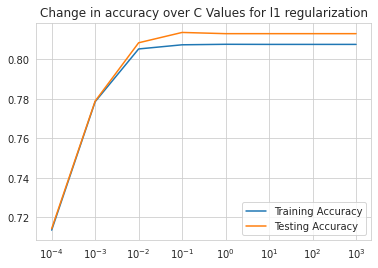

In [73]:
# create a list of c values and empty list for scores
c_values = [0.0001,0.001,0.01,0.1,1,10,100,1000]
train_scores = []
test_scores = []
# iterating over the c values
for c in c_values:

  # instantiate a model with each value of c and fit the model
  log_reg = LogisticRegression(C=c, max_iter=1000,solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train,y_train)
  test_preds_l1 =log_reg_pipe.predict(X_test)


  # add the training and testing scores to the score lists
  train_scores.append(log_reg_pipe.score(X_train,y_train))
  test_scores.append(log_reg_pipe.score(X_test,y_test))

# plot the change in accuracy as the c values changes
figm,ax = plt.subplots(1,1)
ax.plot(c_values,train_scores,label='Training Accuracy')
ax.plot(c_values,test_scores,label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C Values for l1 regularization')
ax.legend()

ax.set_xscale('log')

# print a dictionary of values of c and accuracy scores
{c:score for c, score in zip(c_values,test_scores)} 

{0.0001: 0.7204615384615385,
 0.001: 0.7966153846153846,
 0.01: 0.8103076923076923,
 0.1: 0.813076923076923,
 1: 0.812923076923077,
 10: 0.813076923076923,
 100: 0.813076923076923,
 1000: 0.813076923076923}

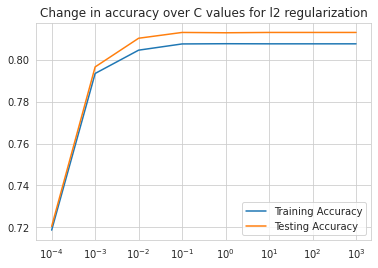

In [74]:
# create a list of c values and empty lists for scores
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []
#iterative over the c values
for c in c_values:
  # instantiate a model with each value of c and fit it on the data
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='lbfgs', penalty='l2')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  # add the training and testing scores to our scores lists
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
  
#plot the change in accuracy as we change the value of C
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l2 regularization')
ax.legend()
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

## **SMOTE**

In [75]:
pd.Series(y_train).value_counts()

0    13915
1     5585
Name: booking_status, dtype: int64

In [76]:
smote = SMOTE(sampling_strategy='auto')


X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
pd.Series(y_train_smote).value_counts()

1    13915
0    13915
Name: booking_status, dtype: int64

In [77]:
log_reg_smote = LogisticRegression(max_iter = 1000)

log_reg_smote_pipe = smote_pipe(scaler, smote, log_reg_smote)
log_reg_smote_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('smote', SMOTE()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

### **Metrics**

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      4643
           1       0.72      0.57      0.63      1857

    accuracy                           0.81      6500
   macro avg       0.78      0.74      0.75      6500
weighted avg       0.81      0.81      0.81      6500



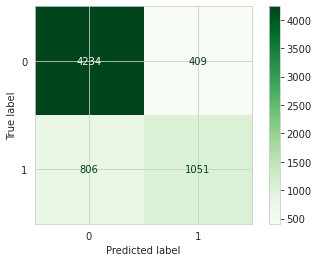

              precision    recall  f1-score   support

           0       0.90      0.76      0.83      4643
           1       0.57      0.79      0.66      1857

    accuracy                           0.77      6500
   macro avg       0.74      0.78      0.74      6500
weighted avg       0.81      0.77      0.78      6500



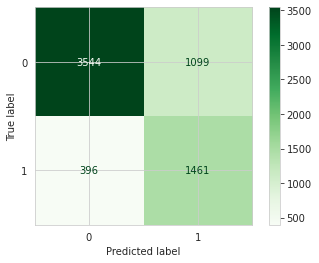

              precision    recall  f1-score   support

           0       0.90      0.77      0.83      4643
           1       0.57      0.78      0.66      1857

    accuracy                           0.77      6500
   macro avg       0.74      0.77      0.74      6500
weighted avg       0.81      0.77      0.78      6500



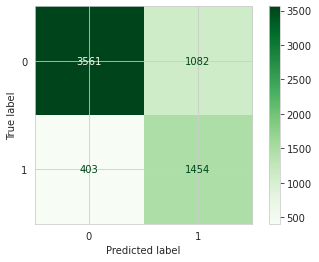

In [78]:
models = [log_reg_pipe, log_reg_weighted_pipe, log_reg_smote_pipe]
for model in models:
  evaluate_classification(model, X_test, y_test)

# **K-Nearest Neighbor Model**

## **Base KNN Model**

In [79]:
# Create an instance of the model
knn = KNeighborsClassifier()
# Create a model pipeline
knn_pipe = make_pipeline(scaler, knn)
# Fit the model
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [80]:
# Save the model's predictions for the train dataset
knn_train_preds = knn_pipe.predict(X_train)
# Save the model's predictions for the test dataset
knn_test_preds = knn_pipe.predict(X_test)

In [81]:
# Calculate the Confusion Matrices
knn_test_confusion_matrix = confusion_matrix(y_test, knn_test_preds, normalize= 'true')

In [82]:
# Display the normalized Confusion Matrices
print(f'KNN Confusion Matrix:\n {knn_test_confusion_matrix}')

KNN Confusion Matrix:
 [[0.8737885  0.1262115 ]
 [0.36133549 0.63866451]]


In [83]:
knn_test_report = classification_report(y_test, knn_test_preds,
                                         target_names=labels) 

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Training Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     13915
           1       0.80      0.72      0.75      5585

    accuracy                           0.87     19500
   macro avg       0.84      0.82      0.83     19500
weighted avg       0.86      0.87      0.86     19500



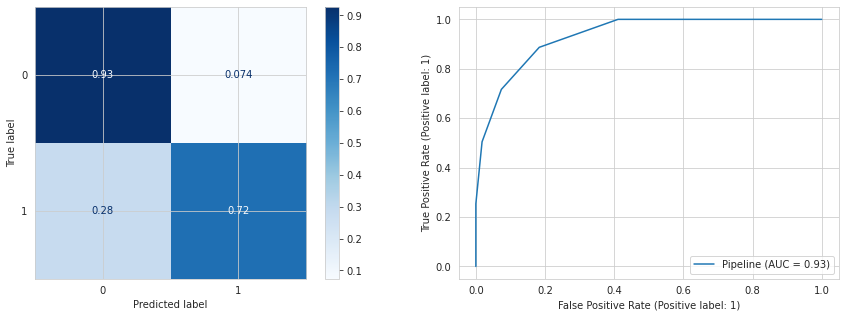

------------------------------------------------------------
[i] CLASSIFICATION REPORT FOR: Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      4643
           1       0.67      0.64      0.65      1857

    accuracy                           0.81      6500
   macro avg       0.76      0.76      0.76      6500
weighted avg       0.80      0.81      0.81      6500



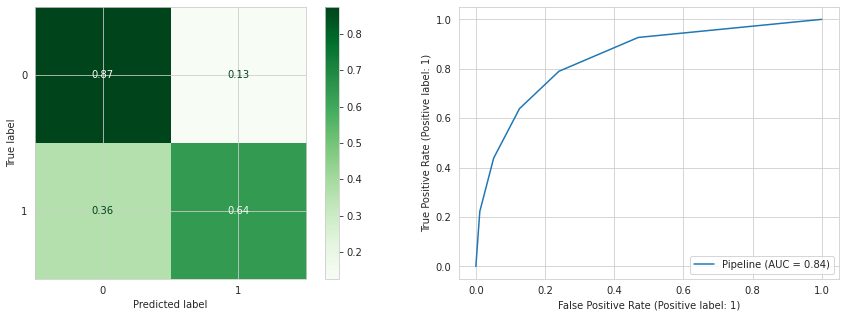

In [84]:
## Use the function twice to evaluate our model on training AND test data
classification_metrics(knn_pipe, X_train,y_train, 
                         cmap='Blues', label='Training Data')
classification_metrics(knn_pipe, X_test,y_test, 
                         cmap='Greens',label='Test Data')

## **Creating a processing pipeline that applies PCA.**

In [85]:
# Create a scaler
scaler = StandardScaler()
# Create a PCA object that will retain 95% of the variance when transforming
pca = PCA(n_components=0.95)
# Combine the scaler and the PCA in a pipeline.
pipe = make_pipeline(scaler, pca)
# Transform the training data and check shape of new features after applying PCA
pipe.fit_transform(X_train)

array([[-1.57098406,  0.38871955,  2.66901446, ..., -1.01258069,
         0.22790653, -0.38743819],
       [-0.48206839, -0.31226398,  0.69536888, ...,  0.30790628,
        -0.06956292, -0.0140072 ],
       [ 2.80893865, -1.14770335, -0.20793502, ...,  1.63250434,
         1.60537174,  1.68888317],
       ...,
       [ 0.03362434,  0.28807391,  0.84907315, ..., -0.75748439,
         0.27580539,  0.99929648],
       [-1.58306831,  0.92834281,  0.75721173, ..., -0.41804539,
         0.60821284, -0.66057206],
       [ 0.46225386, -1.49174694,  0.00910202, ...,  0.9361224 ,
        -0.25219778, -0.32420273]])

In [86]:
%%time
# Create and fit a KNN model WITH PCA 
knn = KNeighborsClassifier()
pca = PCA() 

knnpca = make_pipeline(pipe, knn)

knnpca.fit(X_train, y_train)

CPU times: user 93.2 ms, sys: 65.3 ms, total: 159 ms
Wall time: 92.5 ms


Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('standardscaler', StandardScaler()),
                                 ('pca', PCA(n_components=0.95))])),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [88]:
%%time
# Make predictions and evaluate the model using classification_report
pca_pred = knnpca.predict(X_test)

print('PCA Predictions',classification_report(y_test, pca_pred))

PCA Predictions               precision    recall  f1-score   support

           0       0.86      0.88      0.87      4643
           1       0.67      0.63      0.65      1857

    accuracy                           0.81      6500
   macro avg       0.76      0.76      0.76      6500
weighted avg       0.80      0.81      0.81      6500

CPU times: user 2.02 s, sys: 43.2 ms, total: 2.07 s
Wall time: 2.33 s


## **Tune the Hyperparameters**

In [89]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [90]:
# Tune K utilizing a loop  
krange = range(1,15)
k_list = []
for k in krange:
  knn_pipe = make_pipeline(KNeighborsClassifier(n_neighbors=k))
  knn_pipe.fit(X_train,y_train)
  score = accuracy_score(y_test, knn_pipe.predict(X_test))
  k_list.append(score)

Text(0.5, 1.0, 'Finding the optimal ')

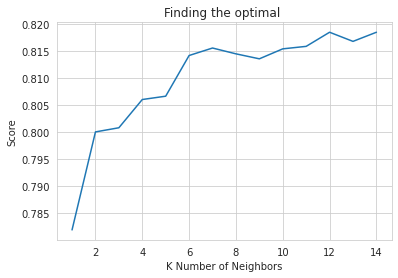

In [91]:
# visualize accuracy scores 
plt.plot(krange, k_list)
plt.xlabel('K Number of Neighbors')
plt.ylabel('Score')
plt.title('Finding the optimal ')

In [92]:
# create an instance of the best model 
knn = KNeighborsClassifier(n_neighbors=12)
# create a model pipeline
knn_pipe = make_pipeline(scaler, knn)
# fit the model
knn_pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=12))])

In [93]:
# saving the model's predictions for the train dataset
knn_train_preds = knn_pipe.predict(X_train)
# saving the model's predictions for the test dataset
knn_trest_preds = knn_pipe.predict(X_test)

In [94]:
# classification report for the test dataset
knn_test_report = classification_report(y_test, knn_test_preds,
                                        target_names=labels)

In [95]:
# Print the Classification Report
print('Classification Report for Test\n')
print(knn_test_report)

Classification Report for Test

              precision    recall  f1-score   support

Not_Canceled       0.86      0.87      0.87      4643
    Canceled       0.67      0.64      0.65      1857

    accuracy                           0.81      6500
   macro avg       0.76      0.76      0.76      6500
weighted avg       0.80      0.81      0.81      6500



## **GridSearchCV**

In [96]:
knn_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=12))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(n_neighbors=12),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 12,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [97]:
pipe_param_grid = {'kneighborsclassifier__n_neighbors': range(1,12),
              'kneighborsclassifier__p': range(1,5),
              'kneighborsclassifier__weights': ['uniform']}

In [ ]:
knn_pipe_gs = GridSearchCV(knn_pipe, pipe_param_grid)

knn_pipe_gs.fit(X_train, y_train)
print('Best KNN Parameters:')
print(knn_pipe_gs.best_params_)
best_pipe = knn_pipe_gs.best_estimator_
print(f'Accuracy of best KNN model is: {best_pipe.score(X_test, y_test)}')

Best KNN Parameters:
{'kneighborsclassifier__n_neighbors': 11, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform'}
Accuracy of best KNN model is: 0.8276923076923077


# **Decision Tree Classification Model**

In [122]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [123]:
# predict the model
dtc_pred = dtc.predict(X_test)

## **Metrics**

In [124]:
# evaluate the Random Forest Model
print('CLF Report',classification_report(y_test, dtc_pred))

CLF Report               precision    recall  f1-score   support

           0       0.86      0.85      0.85      4643
           1       0.63      0.66      0.64      1857

    accuracy                           0.79      6500
   macro avg       0.75      0.75      0.75      6500
weighted avg       0.79      0.79      0.79      6500



In [128]:
# creating the confusion matrix
conf = confusion_matrix(y_test, dtc_pred)
print(f'Confusion Matrix:\n {conf}\n')

Confusion Matrix:
 [[3927  716]
 [ 637 1220]]



# **Best Model For Analysis**

In [129]:
print('PCA Predictions',classification_report(y_test, pca_pred))

PCA Predictions               precision    recall  f1-score   support

           0       0.86      0.88      0.87      4643
           1       0.67      0.63      0.65      1857

    accuracy                           0.81      6500
   macro avg       0.76      0.76      0.76      6500
weighted avg       0.80      0.81      0.81      6500



The best possible model for this dataset would be with the PCA part of the analysis. 